In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [3]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [7]:
dupl = df[df.duplicated()]
len(dupl)

0

In [8]:
len(df)

50

In [9]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot: >

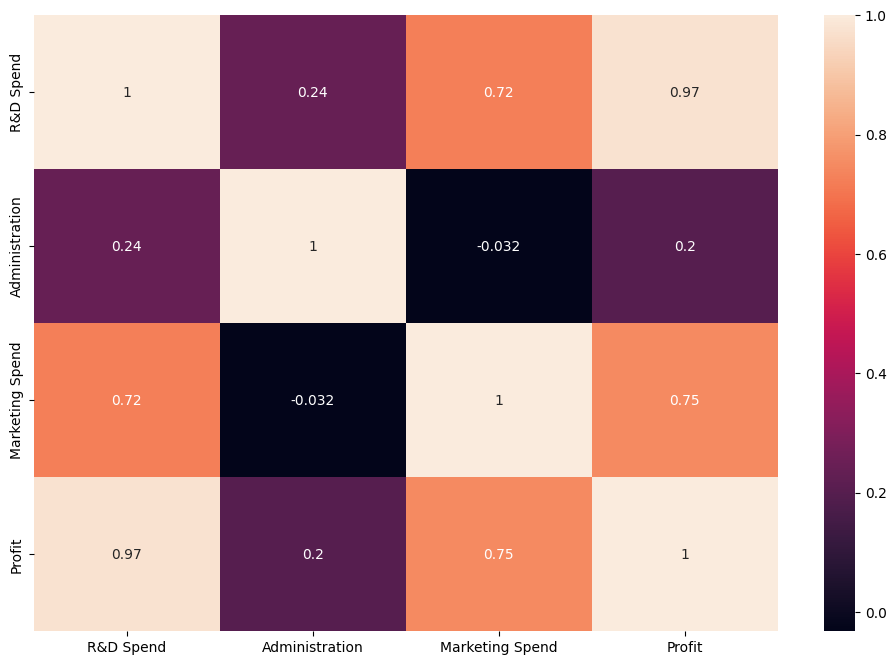

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot: ylabel='count'>

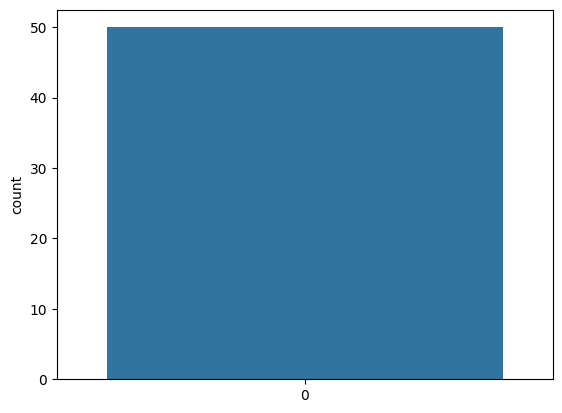

In [11]:
sns.countplot(df['Profit'])

In [12]:
df['Profit'].value_counts()

192261.83    1
89949.14     1
105008.31    1
103282.38    1
101004.64    1
99937.59     1
97483.56     1
97427.84     1
96778.92     1
96712.80     1
96479.51     1
90708.19     1
81229.06     1
191792.06    1
81005.76     1
78239.91     1
77798.83     1
71498.49     1
69758.98     1
65200.33     1
64926.08     1
49490.75     1
42559.73     1
35673.41     1
105733.54    1
107404.34    1
108552.04    1
108733.99    1
191050.39    1
182901.99    1
166187.94    1
156991.12    1
156122.51    1
155752.60    1
152211.77    1
149759.96    1
146121.95    1
144259.40    1
141585.52    1
134307.35    1
132602.65    1
129917.04    1
126992.93    1
125370.37    1
124266.90    1
122776.86    1
118474.03    1
111313.02    1
110352.25    1
14681.40     1
Name: Profit, dtype: int64

array([[<AxesSubplot: title={'center': 'R&D Spend'}>,
        <AxesSubplot: title={'center': 'Administration'}>],
       [<AxesSubplot: title={'center': 'Marketing Spend'}>,
        <AxesSubplot: title={'center': 'Profit'}>]], dtype=object)

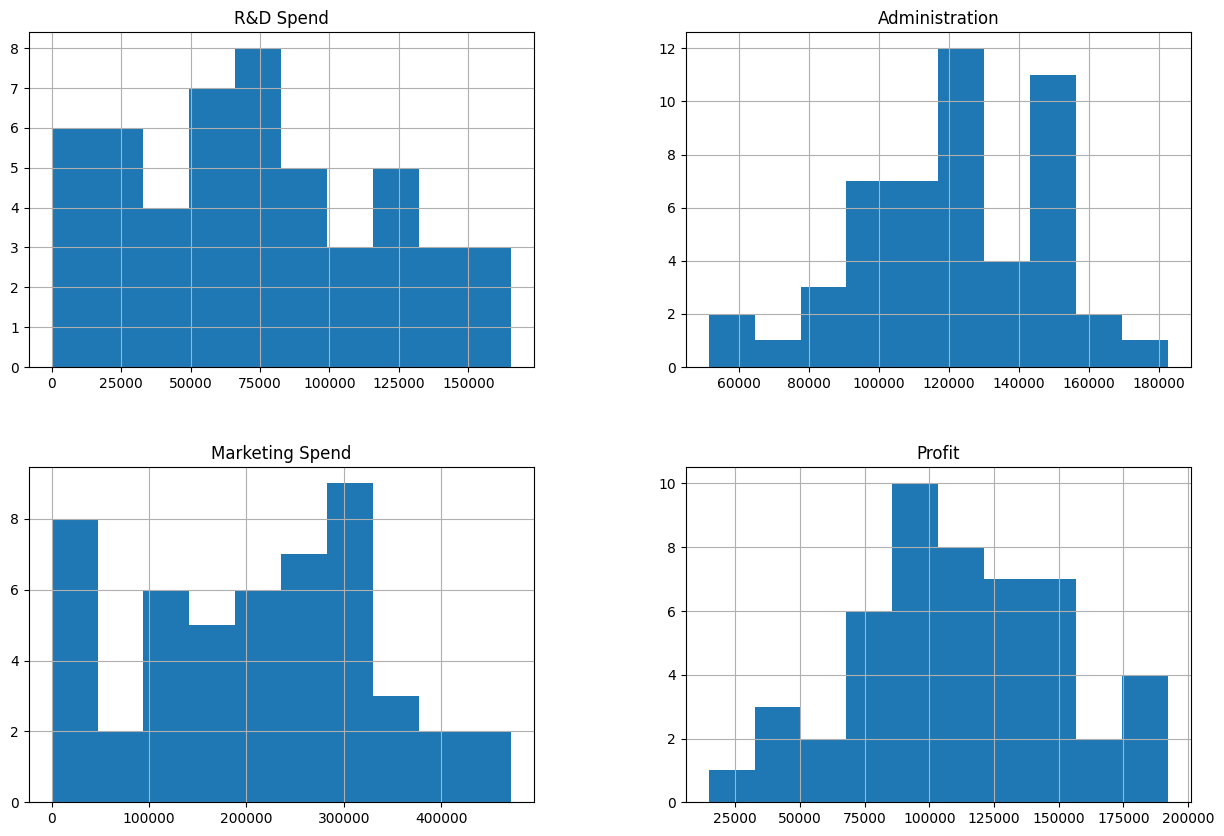

In [13]:
df.hist(figsize = (15,10))

In [14]:
dm = df[['R&D Spend','Administration','Marketing Spend','Profit']].mean()
dm

R&D Spend           73721.6156
Administration     121344.6396
Marketing Spend    211025.0978
Profit             112012.6392
dtype: float64

In [15]:
df = df[~(df == 0).any(axis=1)]
df

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [17]:
X = df.drop('Profit',axis="columns")
X

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [18]:
y = df['Profit']
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
Name: Profit, dtype: float64

In [19]:
model.fit(X,y)

LinearRegression()

In [39]:
model.predict([[17000,15000,444990]])

C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([80090.22427632])

In [21]:
model.score(X,y)

0.9608231830180131

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values,y.values,test_size=0.2)

In [24]:
X_train, X_test, y_train, y_test

(array([[ 64664.71, 139553.16, 137962.62],
        [100671.96,  91790.61, 249744.55],
        [ 78013.11, 121597.55, 264346.06],
        [134615.46, 147198.87, 127716.82],
        [ 66051.52, 182645.56, 118148.2 ],
        [ 65605.48, 153032.06, 107138.38],
        [  1000.23, 124153.04,   1903.93],
        [ 76253.86, 113867.3 , 298664.47],
        [131876.9 ,  99814.71, 362861.36],
        [ 38558.51,  82982.09, 174999.3 ],
        [ 46426.07, 157693.92, 210797.67],
        [ 22177.74, 154806.14,  28334.72],
        [ 46014.02,  85047.44, 205517.64],
        [ 15505.73, 127382.3 ,  35534.17],
        [ 94657.16, 145077.58, 282574.31],
        [ 73994.56, 122782.75, 303319.26],
        [ 67532.53, 105751.03, 304768.73],
        [165349.2 , 136897.8 , 471784.1 ],
        [ 75328.87, 144135.98, 134050.07],
        [ 28663.76, 127056.21, 201126.82],
        [144372.41, 118671.85, 383199.62],
        [ 28754.33, 118546.05, 172795.67],
        [ 91992.39, 135495.07, 252664.93],
        [ 6

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [26]:
lr = LinearRegression()

# Fit the model using the training data
lr.fit(X_train, y_train)
lr.score(X_test,y_test)
#lr.score(X_train,y_train)


0.9690407741538065

In [27]:

# predicting the test set results
y_pred = model.predict(X_test)

# calculating regression metrics
print('Linear Regression Metrics:')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))


Linear Regression Metrics:
MAE: 5567.117072634753
MSE: 42131248.690808795
RMSE: 6490.8588561768
R2: 0.9748255705682932


C:\Users\Kush-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
print('\nPolynomial Regression Metrics:')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))


Polynomial Regression Metrics:
MAE: 5567.117072634753
MSE: 42131248.690808795
RMSE: 6490.8588561768
R2: 0.9748255705682932


In [29]:
# fitting decision tree regression to the training set
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X_train, y_train)
dt_regressor.score(X_train, y_train)
#dt_regressor.score(X_test, y_test)


#0.9122603767936069

1.0

In [30]:

# predicting the test set results
y_pred = dt_regressor.predict(X_test)

# calculating regression metrics
print('\nDecision Tree Regression Metrics:')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))


Decision Tree Regression Metrics:
MAE: 14650.604999999996
MSE: 368232310.53999007
RMSE: 19189.38014996811
R2: 0.7799723814455647


In [31]:
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=0)
rf_regressor.fit(X_train, y_train)
rf_regressor.score(X_test, y_test)
#rf_regressor.score(X_train, y_train)


0.8649031003658771

In [32]:
y_pred = rf_regressor.predict(X_test)

# calculating regression metrics
print('\nRandom Forest Regression Metrics:')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))



Random Forest Regression Metrics:
MAE: 11336.823199999995
MSE: 226094541.33938494
RMSE: 15036.440447771705
R2: 0.8649031003658771


In [40]:
rf_regressor.predict([[17000,15000,444990]])

array([103582.279])

In [33]:
#We can see that the random forest regression model outperformed the other two models in terms of all the metrics, with the lowest values of MSE, RMSE, and the highest value of R-squared. Therefore, the random forest regression model is the best model for this dataset.


In [35]:
#For Random Forest Regression
import pickle
with open('PROFITMODEL.pkl', 'wb') as f:
    pickle.dump([rf_regressor,X_train], f)